Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-549.891, Time=0.24 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1479.500, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=941.085, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-547.010, Time=0.20 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=-553.751, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=554.744, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=-549.734, Time=0.35 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=-553.112, Time=2.59 sec
 ARIMA(0,0,3)(0,0,0)[0]             : AIC=294.360, Time=0.14 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=-551.696, Time=0.27 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-558.076, Time=0.43 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=-60.651, Time=0.22 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-555.417, Time=0.08 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=

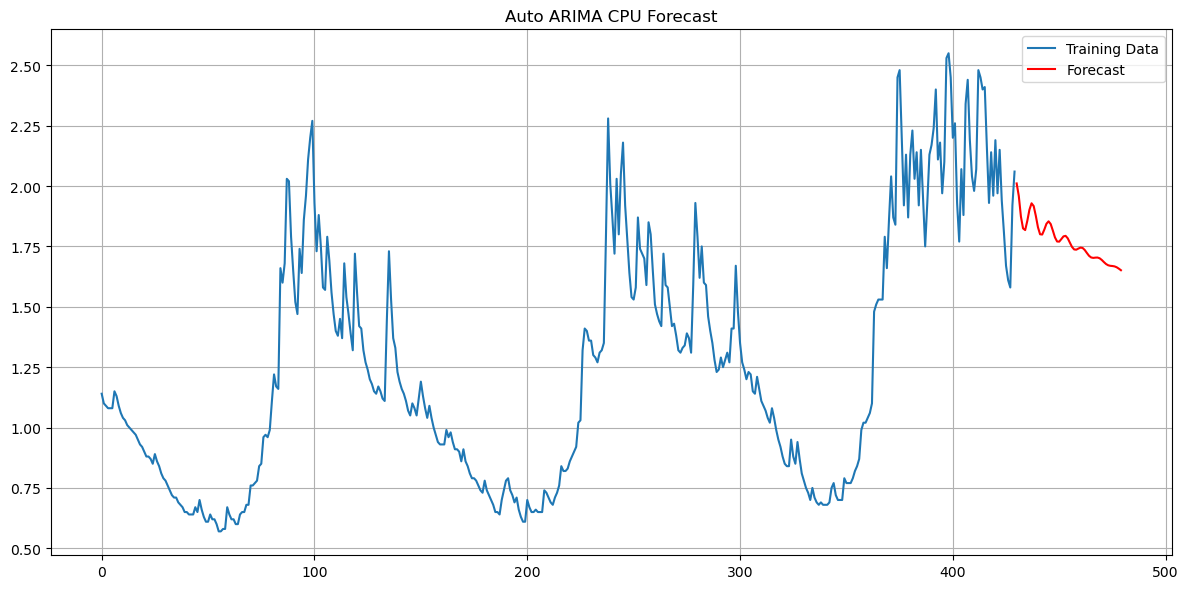

MAE:  0.6254
MSE:  0.4522
RMSE: 0.6725


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

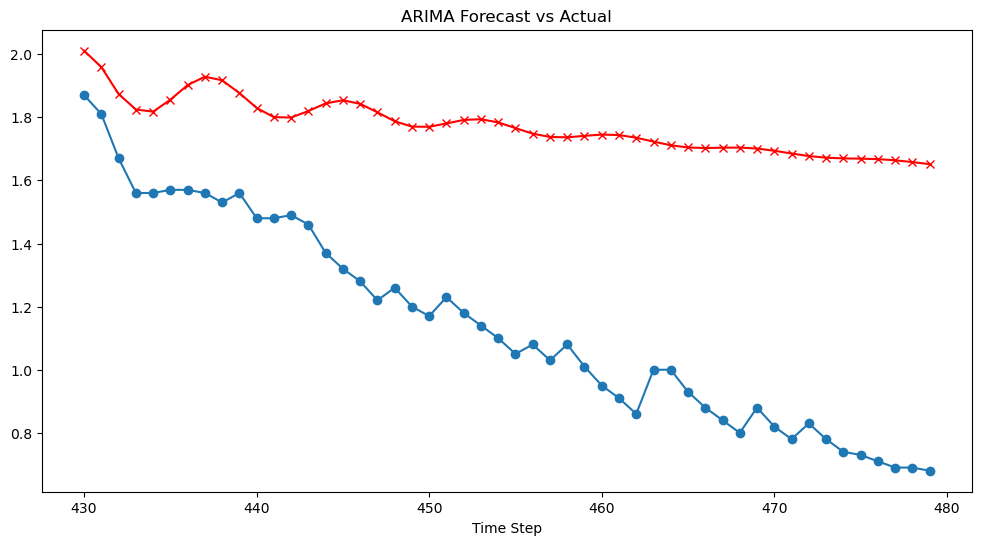

In [24]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# 1. Load data
df = pd.read_csv("/Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/CPU_DATA FRA KAGGLE/Test/ww/datasets/gauravduttakiit/cpu-utilization/cpu-full-a.csv")
data = df['cpu'].values

# Define forecast horizon 
forecast_horizon = 50

# 2. Split data into train and test
train, test = data[:-forecast_horizon], data[-forecast_horizon:]

# 3. Fit ARIMA automatically
model = auto_arima(train, 
                   start_p=1, start_q=1,     
                   max_p=11, max_q=11,         
                   d=0,                        # tving differensiering til 0
                   seasonal=False,
                   information_criterion='aic',
                   trace=True,
                   error_action='ignore',  
                   suppress_warnings=True,
                   stepwise=True)             # stepwise False for full søk


# Print best model summary
print(model.summary())

# 4. Forecast future steps (length of test)
forecast = model.predict(n_periods=forecast_horizon)

# 5. Plot forecast vs training data
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(range(len(train), len(train) + forecast_horizon), forecast, label="Forecast", color='red')
plt.legend()
plt.title("Auto ARIMA CPU Forecast")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Evaluate the forecast
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# 7. Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(range(len(data) - forecast_horizon, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data) - forecast_horizon, len(data)), forecast, label='Forecast', marker='x', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Time Step")
plt


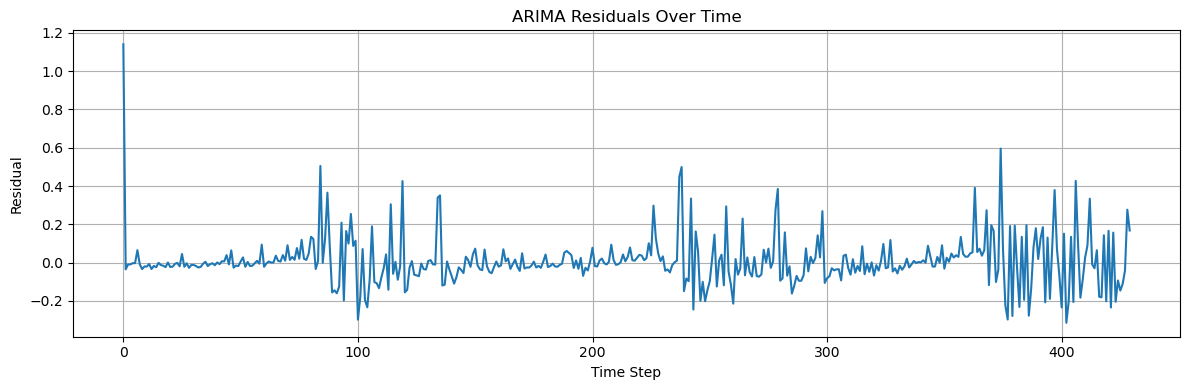

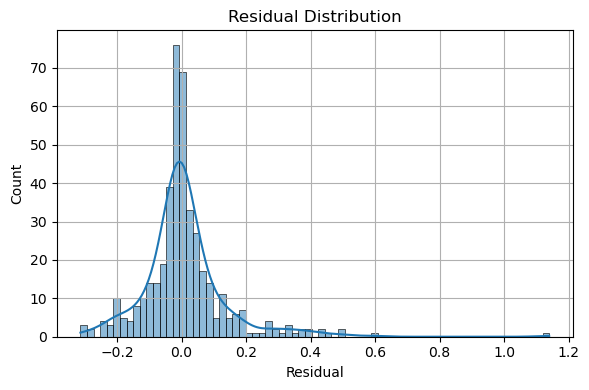

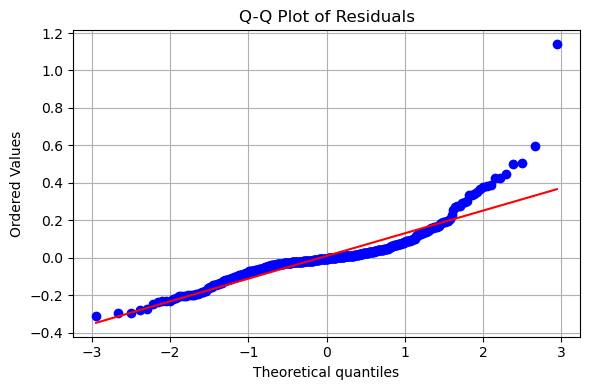

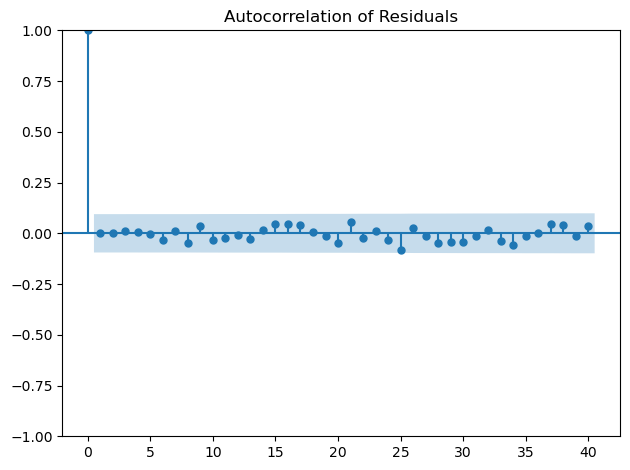

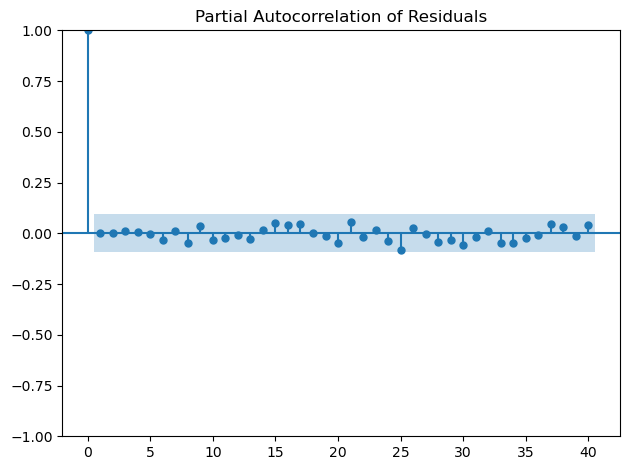

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 1. Get residuals from the model
residuals = model.resid()

# 2. Plot residuals over time
plt.figure(figsize=(12, 4))
plt.plot(residuals)
plt.title("ARIMA Residuals Over Time")
plt.xlabel("Time Step")
plt.ylabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Histogram + KDE of residuals
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Q-Q plot to check normality
plt.figure(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

# 5. ACF & PACF plots to check autocorrelation
plot_acf(residuals, lags=40)
plt.title("Autocorrelation of Residuals")
plt.tight_layout()
plt.show()

plot_pacf(residuals, lags=40)
plt.title("Partial Autocorrelation of Residuals")
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  430
Model:               ARIMA(11, 0, 11)   Log Likelihood                 300.974
Date:                Mon, 07 Apr 2025   AIC                           -553.949
Time:                        21:18:39   BIC                           -456.418
Sample:                             0   HQIC                          -515.437
                                - 430                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2418      0.187      6.651      0.000       0.876       1.608
ar.L1          1.1062      0.245      4.519      0.000       0.626       1.586
ar.L2          0.0716      0.288      0.249      0.8

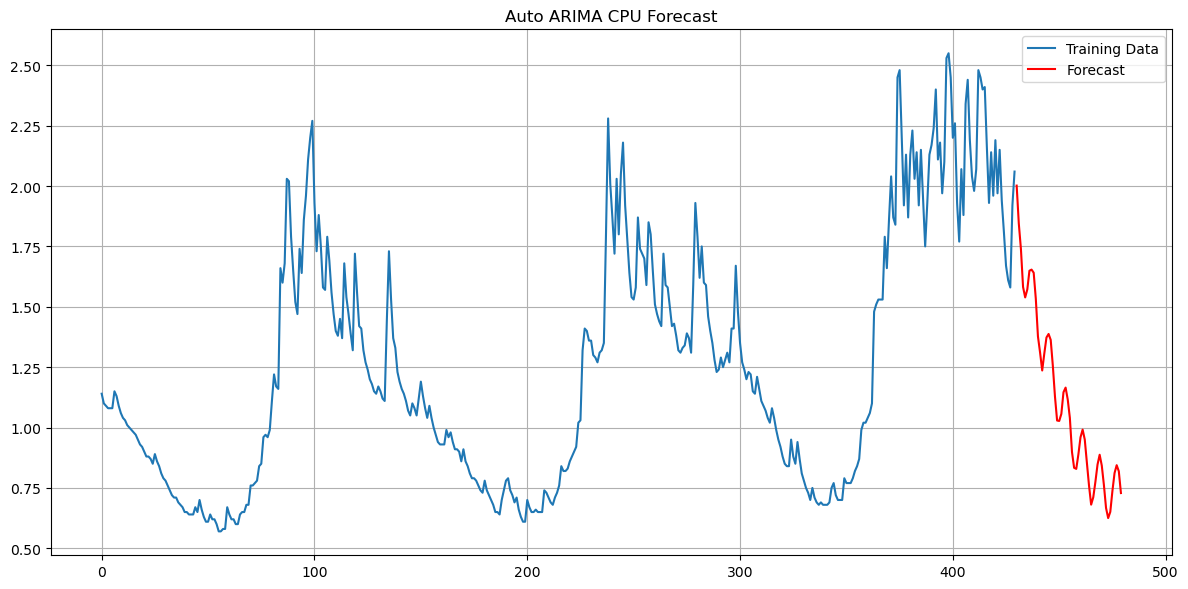

MAE:  0.0982
MSE:  0.0149
RMSE: 0.1220


<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.12/site-packages/matplotlib/pyplot.py'>

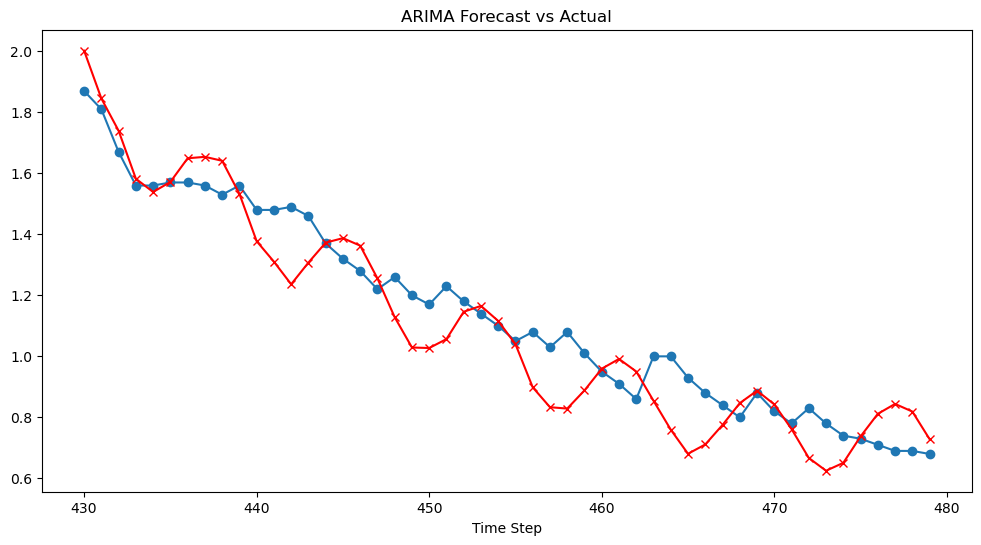

In [8]:
import pandas as pd
from pmdarima import auto_arima
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

# 1. Load data
df = pd.read_csv("/Users/biraveennedunchelian/Documents/Masteroppgave/Masteroppgave/CPU_DATA FRA KAGGLE/Test/ww/datasets/gauravduttakiit/cpu-utilization/cpu-full-a.csv")
data = df['cpu'].values

# Define forecast horizon 
forecast_horizon = 50

# 2. Split data into train and test
train, test = data[:-forecast_horizon], data[-forecast_horizon:]


# Set your own p, d, q values
p = 11  # autoregressive term
d = 0  # differencing term
q = 11  # moving average term

# Fit the ARIMA model
model = ARIMA(train, order=(p, d, q))
fitted_model = model.fit()

# Print summary
print(fitted_model.summary())

# 4. Forecast future steps (length of test)
forecast = fitted_model.forecast(steps=forecast_horizon)

# 5. Plot forecast vs training data
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(range(len(train), len(train) + forecast_horizon), forecast, label="Forecast", color='red')
plt.legend()
plt.title("Auto ARIMA CPU Forecast")
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Evaluate the forecast
mae = mean_absolute_error(test, forecast)
mse = mean_squared_error(test, forecast)
rmse = np.sqrt(mse)

print(f"MAE:  {mae:.4f}")
print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")

# 7. Plot actual vs forecast
plt.figure(figsize=(12, 6))
plt.plot(range(len(data) - forecast_horizon, len(data)), test, label='Actual', marker='o')
plt.plot(range(len(data) - forecast_horizon, len(data)), forecast, label='Forecast', marker='x', color='red')
plt.title("ARIMA Forecast vs Actual")
plt.xlabel("Time Step")
plt
